In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lab1_proto as proto
import lab1_tools as tool

In [2]:
example = np.load('lab1_example.npz', allow_pickle=True)['example'].item()
data = np.load('lab1_data.npz', allow_pickle=True)['data']

In [3]:
samples = example['samples']
samples.dtype

dtype('int16')

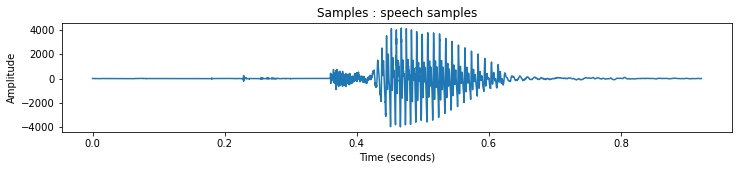

In [5]:
sr = example['samplingrate'] #20KHz
# Generate time axis in seconds
time = np.linspace(0, len(samples) / sr, num=len(samples))

# Plot the waveform
plt.figure(figsize=(12, 2))
plt.plot(time, samples)
plt.title('Samples : speech samples')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

In [6]:
# Calculate window length and shift in samples given time values
winlen_time = 0.020  # Window length in seconds 
winshift_time = 0.010  # Window shift in seconds 

winlen_samples = int(winlen_time * sr)  # Convert window length to samples
winshift_samples = int(winshift_time * sr)  # Convert window shift to samples

frames = proto.enframe(samples, winlen_samples, winshift_samples)
print("Shape of frames:", frames.shape)
print("Real Shape of frames:", example["frames"].shape)


Shape of frames: (91, 400)
Real Shape of frames: (91, 400)


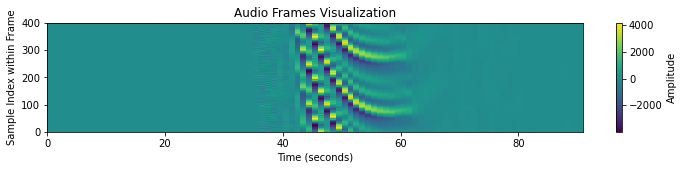

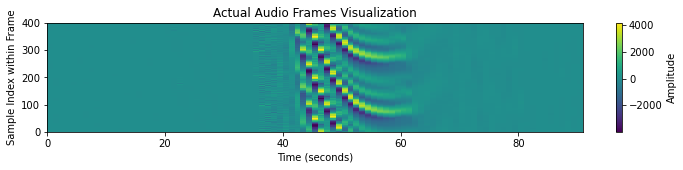

In [7]:
# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(frames.T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('Audio Frames Visualization')
plt.show()

# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(example["frames"].T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('Actual Audio Frames Visualization')
plt.show()

In [8]:
preemph = proto.preemp(frames)

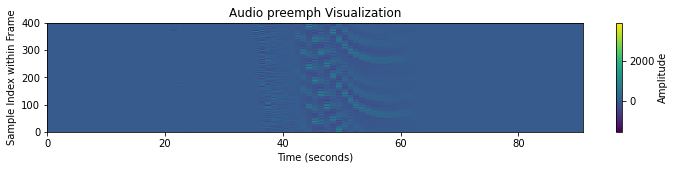

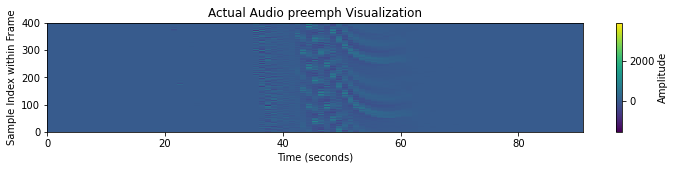

In [26]:

# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(preemph.T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('Audio preemph Visualization')
plt.show()


# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(example["preemph"].T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('Actual Audio preemph Visualization')
plt.show()

In [10]:
windowed = proto.windowing(preemph)

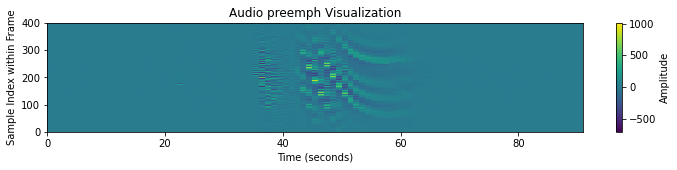

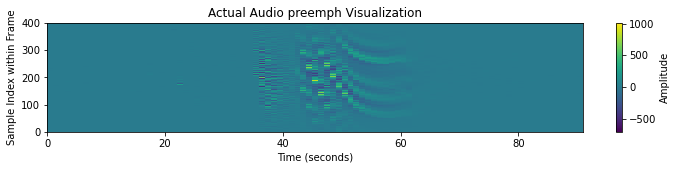

In [28]:
# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(windowed.T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('Audio preemph Visualization')
plt.show()


# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(example["windowed"].T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('Actual Audio preemph Visualization')
plt.show()

In [12]:
spec = proto.powerSpectrum(windowed, 512)

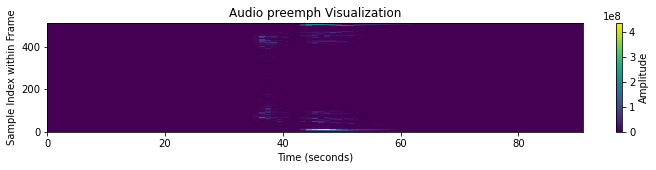

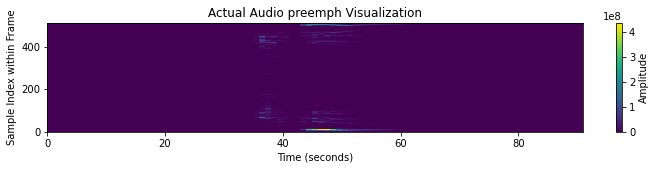

In [32]:

# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(spec.T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('Audio preemph Visualization')
plt.show()

# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(example["spec"].T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('Actual Audio preemph Visualization')
plt.show()

In [14]:
mspec = proto.logMelSpectrum(spec, sr)

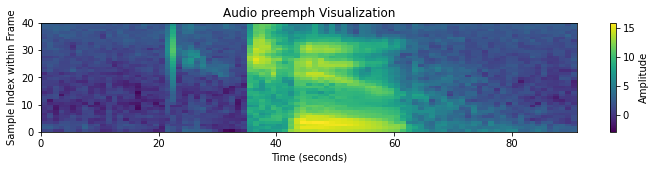

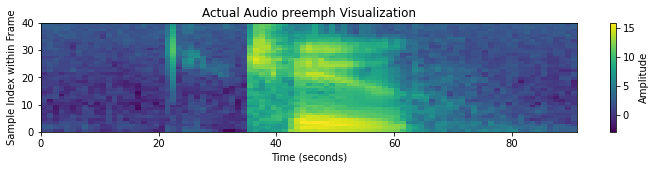

In [33]:


# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh( mspec.T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('Audio preemph Visualization')
plt.show()


# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(example["mspec"].T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('Actual Audio preemph Visualization')
plt.show()

In [16]:
mfcc = proto.cepstrum(mspec, nceps=13)

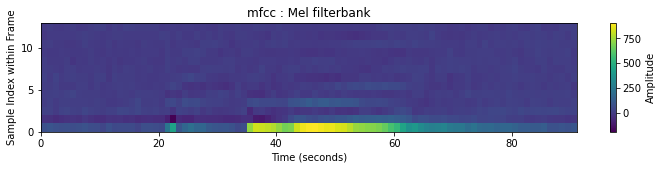

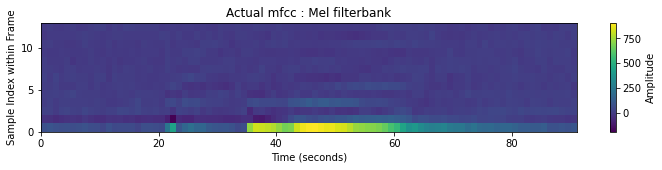

In [34]:

# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(mfcc.T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('mfcc : Mel filterbank')
plt.show()

# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(example["mfcc"].T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('Actual mfcc : Mel filterbank')
plt.show()

In [35]:
lmfcc = tool.lifter(mfcc, lifter=22)

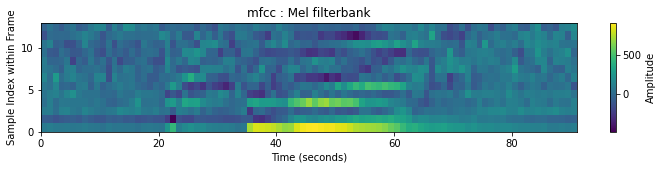

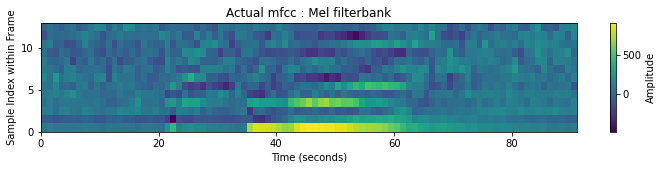

In [36]:
# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(lmfcc.T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('mfcc : Mel filterbank')
plt.show()

# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(example["lmfcc"].T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Sample Index within Frame')
plt.title('Actual mfcc : Mel filterbank')
plt.show()

## Feature Correlation

In [20]:
def compute_mfcc_features(data):
    mfcc_features = []

    # Iterate over all utterances in the data set
    for utterance in data:
        # Compute MFCC features for current utterance and add to feature array
        utterance_mfcc = proto.mfcc(utterance["samples"]) # Return (N x 13) array, where N is the window amount for this utterance
        mfcc_features.append(utterance_mfcc)        # Add this (N x 13) array to our mfcc feature array

    # We have a (K x N x 13) array, which we concatenate so it gets the shape (K*N, 13)
    mfcc_feature_arr = np.concatenate(mfcc_features, axis=0)

    print("MFCC Feature Array shape:", mfcc_feature_arr.shape)
    return mfcc_feature_arr

def compute_correlation_matrix(mfcc_feature_arr):
    # Compute the correlation matrix
    correlation_matrix = np.corrcoef(mfcc_feature_arr, rowvar=False) # rowvar is false as rows = observations and cols = coefficients
    return correlation_matrix


mfcc_feature_arr = compute_mfcc_features(data)
correlation_matrix = compute_correlation_matrix(mfcc_feature_arr)

MFCC Feature Array shape: (3883, 13)


In [21]:
def compute_mfcc_correct(data):
    mfcc_features = []

    # Iterate over all utterances in the data set
    for utterance in data:
        # Compute MFCC features for current utterance and add to feature array
        utterance_mfcc = utterance["mfcc"] # Return (N x 13) array, where N is the window amount for this utterance
        mfcc_features.append(utterance_mfcc)        # Add this (N x 13) array to our mfcc feature array

    # We have a (K x N x 13) array, which we concatenate so it gets the shape (K*N, 13)
    mfcc_feature_arr = np.concatenate(mfcc_features, axis=0)

    print("MFCC Feature Array shape:", mfcc_feature_arr.shape)
    return mfcc_feature_arr

def compute_correlation_matrix(mfcc_feature_arr):
    # Compute the correlation matrix
    correlation_matrix = np.corrcoef(mfcc_feature_arr, rowvar=False) # rowvar is false as rows = observations and cols = coefficients
    return correlation_matrix


mfcc_feature_arr = compute_mfcc_correct(example)
correlation_matrix = compute_correlation_matrix(mfcc_feature_arr)

TypeError: string indices must be integers

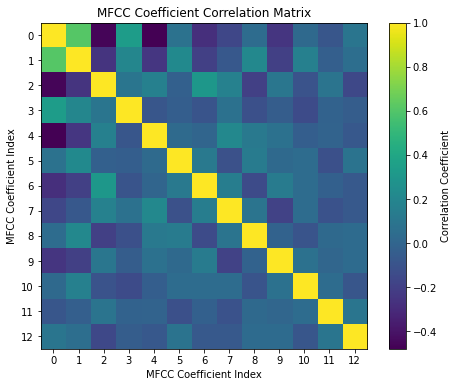

In [22]:
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title('MFCC Coefficient Correlation Matrix')
plt.xlabel('MFCC Coefficient Index')
plt.ylabel('MFCC Coefficient Index')
plt.xticks(np.arange(13))
plt.yticks(np.arange(13))
plt.grid(False)
plt.show()

## Gaussian Mixture Models

In [23]:
from sklearn.mixture import GaussianMixture

gm_4 = GaussianMixture(n_components=4, random_state=0).fit(mfcc_feature_arr)
gm_8 = GaussianMixture(n_components=8, random_state=0).fit(mfcc_feature_arr)
gm_16 = GaussianMixture(n_components=16, random_state=0).fit(mfcc_feature_arr)
gm_32 = GaussianMixture(n_components=32, random_state=0).fit(mfcc_feature_arr)

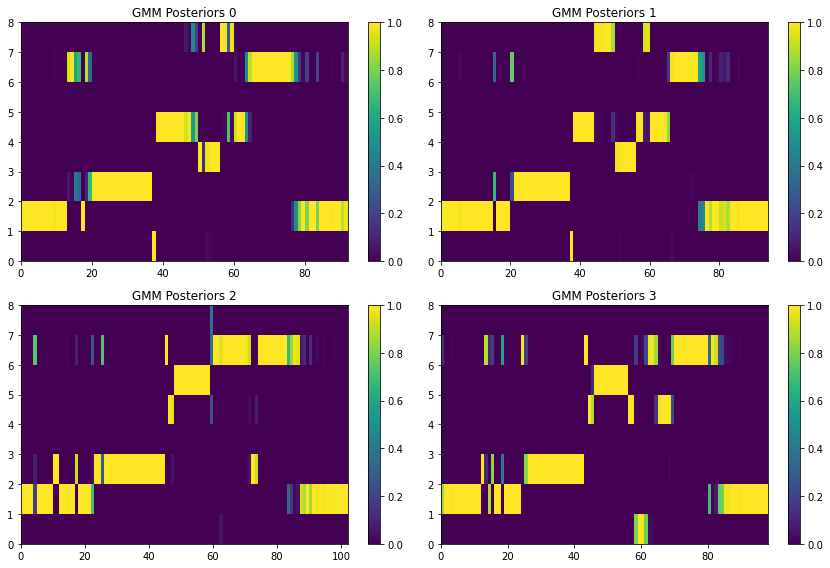

In [24]:
def gmm_visualize(gm, mffc_samples):
  posteriors = []
  for sample in mffc_samples:
    posteriors.append(gm.predict_proba(sample))

  plt.figure(figsize=(12, 8))

  for i, posterior in enumerate(posteriors):
    plt.subplot(2, 2, i+1)
    plt.pcolormesh(posterior.T, cmap='viridis')
    plt.title(f'GMM Posteriors {i}')
    plt.colorbar()

  plt.tight_layout()
  plt.show()

mffc_utterances = []
samples_indicies = [16,17,38,39]
for index in samples_indicies:
  mffc_utterances.append(proto.mfcc(data[index]["samples"]))

# Plot the GMM posteriors for each occurrence of the word "seven"
gmm_visualize(gm_8, mffc_utterances)

In [25]:
import scipy
from scipy.spatial.distance import cdist

def local_dist(utterance_1, utterance_2):
    mffc_1 = proto.mfcc(utterance_1)
    mffc_2 = proto.mfcc(utterance_2)

    # Compute the Euclidean distance between each pair
    dist_arr = cdist(mffc_1, mffc_2)
    return dist_arr

sample_1 = data[17]['samples']
sample_2 = data[16]['samples']
local_dist(sample_1, sample_2).shape

(94, 92)